In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np

In [62]:
#input data

input = "L'_CN-L_IR.csv"

df = pd.read_csv(input, sep=",")
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors="coerce")
df[df.columns[2]] = pd.to_numeric(df[df.columns[2]], errors="coerce")

L_CN = df[df.columns[1]]
L_IR = df[df.columns[2]]

In [63]:
L_CN_us = df[df.columns[1]].iloc[0:6]
L_IR_us = df[df.columns[2]].iloc[0:6]

L_CN_Aalto = df[df.columns[1]].iloc[7:15]
L_IR_Aalto = df[df.columns[2]].iloc[7:15]

In [64]:
#fitting:y=ax+b

a, b = np.polyfit(L_CN, L_IR, 1)

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USER\AppData\Local\Temp\ipykernel_16900\1970471328.py:10: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("L\'$_{CN}$(K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$)", fontsize=14)


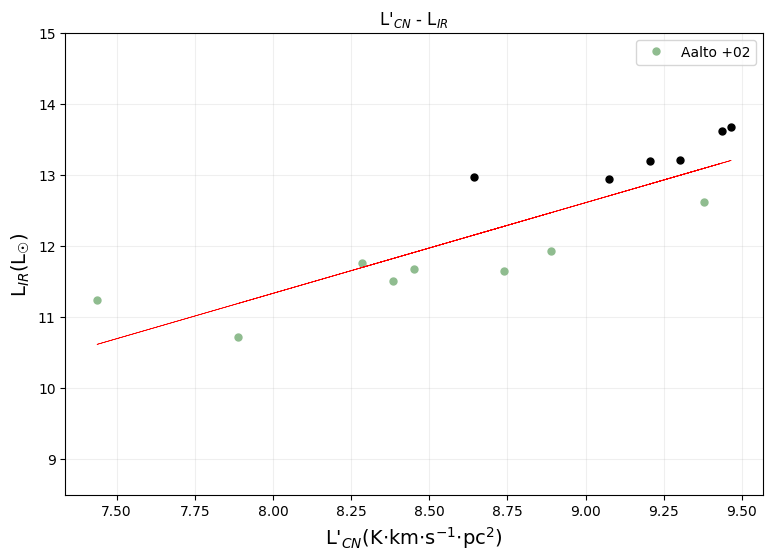

In [65]:
#plot

plt.figure(figsize=(9,6))
plt.title("L\'$_{CN}$ - L$_{IR}$")
#plt.scatter(L_CN, L_IR, color="black", s=10)
plt.plot(L_CN_us, L_IR_us, "o", color="black", markersize=5)
plt.plot(L_CN_Aalto, L_IR_Aalto, "o", color="darkseagreen", markersize=5, label="Aalto +02")
plt.plot(L_CN, a*L_CN + b, "-", lw=0.5, color="red")
plt.ylim(8.5, 15)
plt.xlabel("L\'$_{CN}$(K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$)", fontsize=14)
plt.ylabel("L$_{IR}$(L$_\u2609$)", fontsize=14)
#plt.xlim(5, 10)
plt.grid(alpha=0.2)


plt.legend()
plt.show()

In [66]:
#fitting:y=ax+b

a_us, b_us = np.polyfit(L_CN_us, L_IR_us, 1)
a_Aalto, b_Aalto = np.polyfit(L_CN_Aalto, L_IR_Aalto, 1)


<>:30: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USER\AppData\Local\Temp\ipykernel_16900\1456117606.py:30: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("log[L\'$_{CN}$](log[K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$])", fontsize=14)


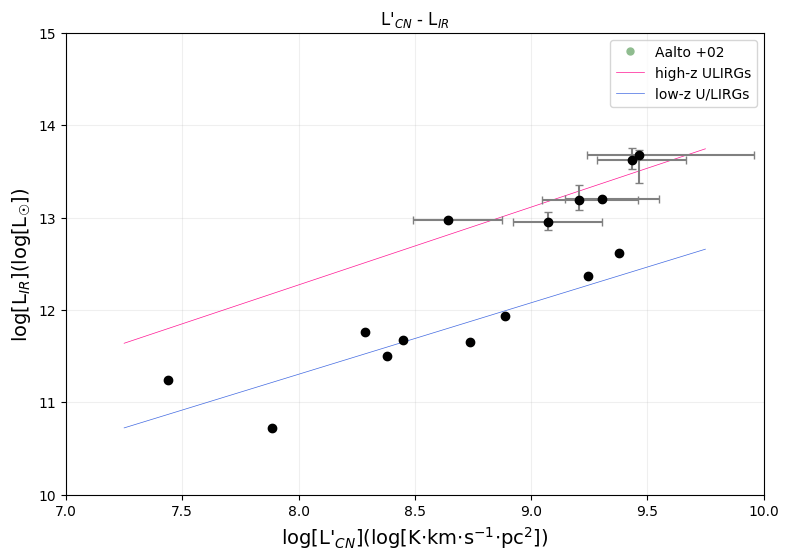

0.841789754903114 5.537347592409808
0.7736316510538969 5.115466794107415


In [67]:
plt.figure(figsize=(9,6))
plt.title("L\'$_{CN}$ - L$_{IR}$")
plt.plot(L_CN_us, L_IR_us, "o", color="black", markersize=5)
plt.plot(L_CN_Aalto, L_IR_Aalto, "o", color="darkseagreen", markersize=5, label="Aalto +02")

#x_us = np.linspace(min(L_CN_Aalto), max(L_CN_us), 100)
#x_Aalto = np.linspace(min(L_CN_Aalto), max(L_CN_us), 100)

x_us = np.linspace(7.25, 9.75, 100)
x_Aalto = np.linspace(7.25, 9.75, 100)

plt.plot(x_us, a_us*x_us + b_us, "-", lw=0.5, color="deeppink", label="high-z ULIRGs")
plt.plot(x_Aalto, a_Aalto*x_Aalto + b_Aalto, "-", lw=0.5, color="royalblue", label="low-z U/LIRGs")

x = df['log_L_CN']
y = df['log_L_IR']

xerr = [df['L_CN_err_low'], df['L_CN_err_high']]
yerr = [df['L_IR_err_low'], df['L_IR_err_high']]

plt.errorbar(
    x, y,
    xerr=xerr, yerr=yerr,
    fmt="o", capsize=3, color="black", ecolor="gray"
)


plt.ylim(10, 15)
plt.xlim(7., 10)
plt.xlabel("log[L\'$_{CN}$](log[K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$])", fontsize=14)
plt.ylabel("log[L$_{IR}$](log[L$_\u2609$])", fontsize=14)
plt.grid(alpha=0.2)
plt.legend()
plt.show()

print(a_us, b_us)
print(a_Aalto, b_Aalto)